In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [9]:
# Load breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])

In [10]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Initialize classifiers
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

In [13]:
# Train and evaluate classifiers
classifiers = [knn, decision_tree, logistic_regression, random_forest]
results = {}
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_scaled, y_train.values.ravel())
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[clf_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}


In [14]:
# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T  # Transpose to have classifiers as rows and metrics as columns


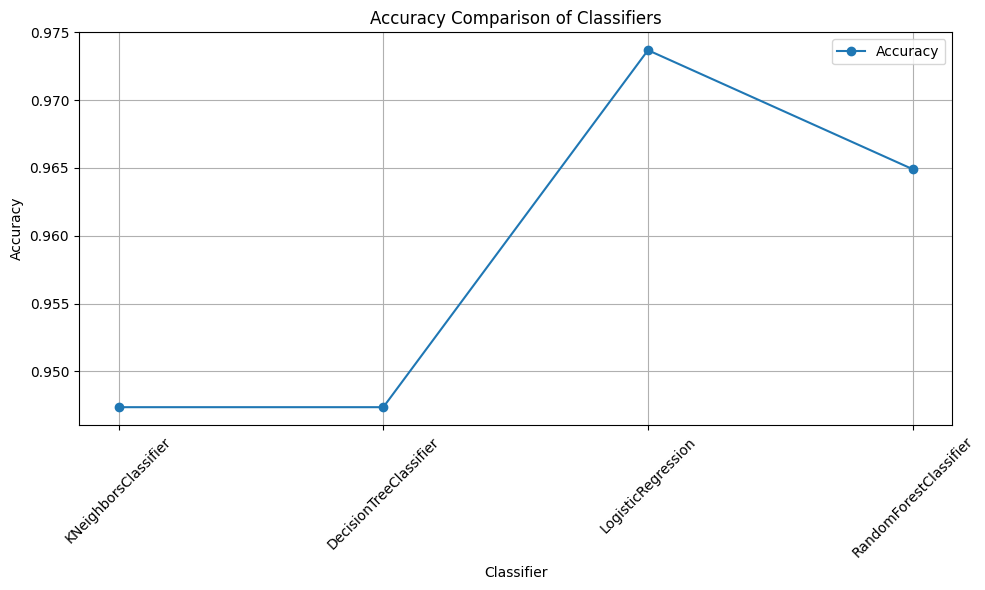

In [18]:
# Plot individual line graph for accuracy
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Accuracy'], marker='o', label='Accuracy')

plt.title('Accuracy Comparison of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


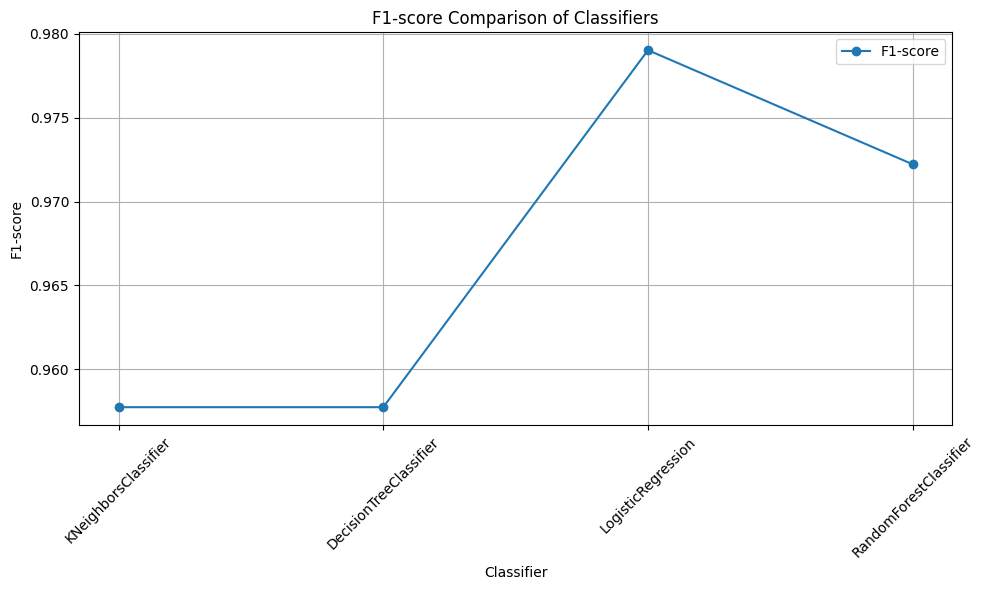

In [19]:
# Plot individual line graph for F1-score
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['F1-score'], marker='o', label='F1-score')

plt.title('F1-score Comparison of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('F1-score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

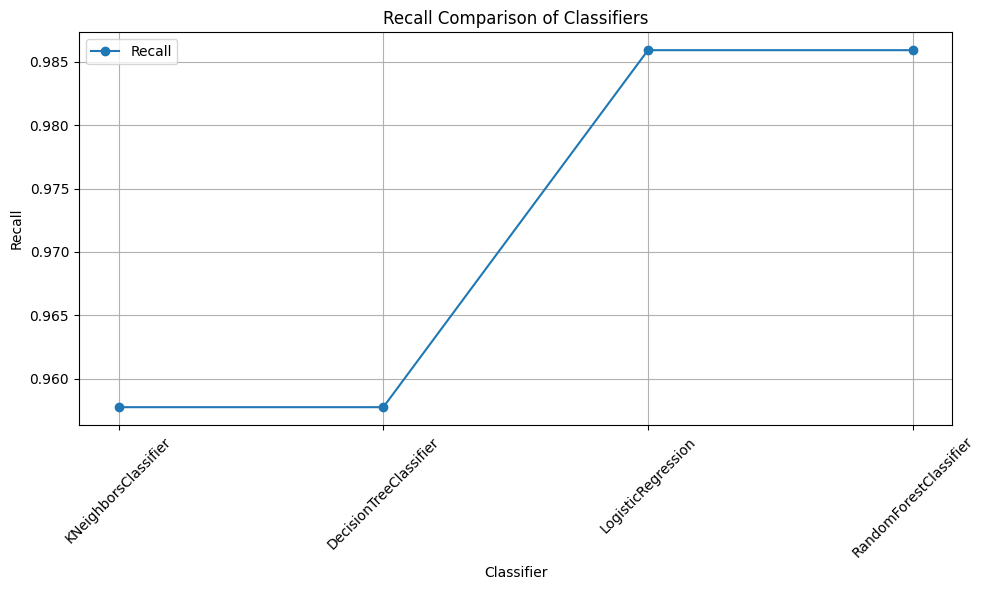

In [20]:
# Plot individual line graph for Recall
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Recall'], marker='o', label='Recall')

plt.title('Recall Comparison of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

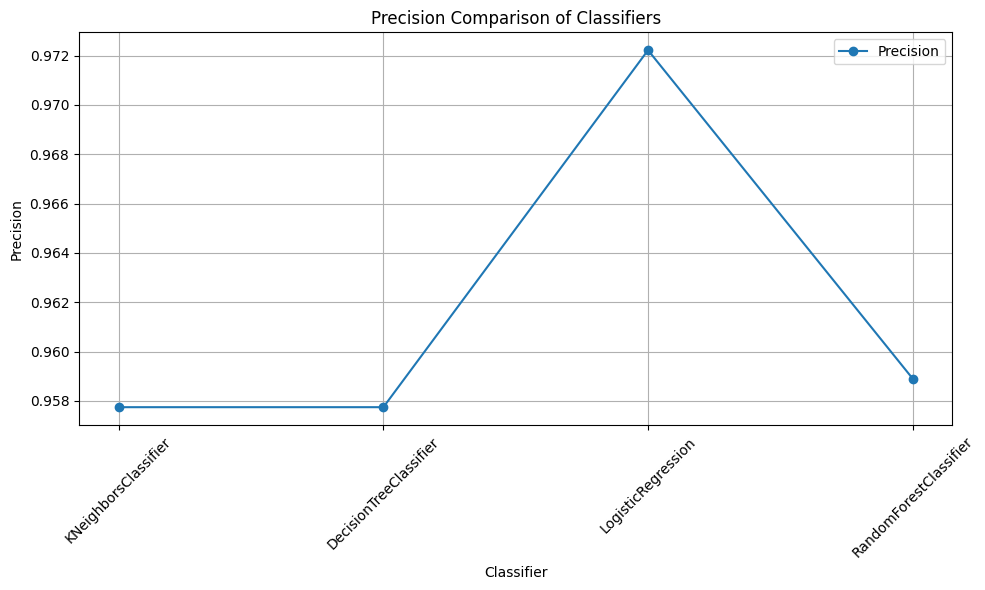

In [21]:
# Plot individual line graph for Precision
plt.figure(figsize=(10, 6))
plt.plot(results_df.index, results_df['Precision'], marker='o', label='Precision')

plt.title('Precision Comparison of Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

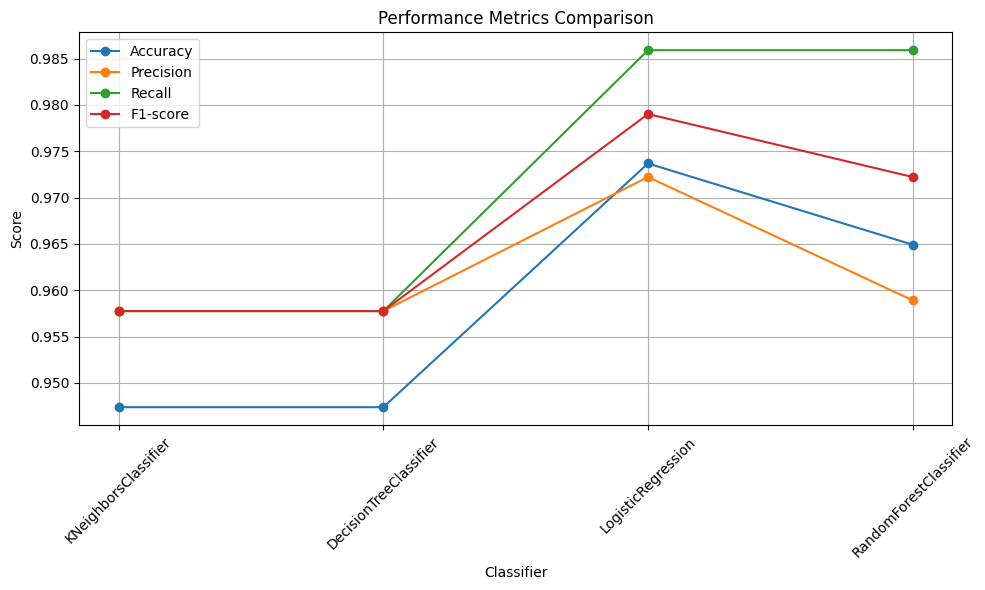

In [16]:
# Plotting line graph
plt.figure(figsize=(10, 6))

for metric in results_df.columns:
    plt.plot(results_df.index, results_df[metric], marker='o', label=metric)

plt.title('Performance Metrics Comparison')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Display the metrics in table form
print("\nPerformance Metrics:\n", results_df)


Performance Metrics:
                         Accuracy  Precision    Recall  F1-score
KNeighborsClassifier    0.947368   0.957746  0.957746  0.957746
DecisionTreeClassifier  0.947368   0.957746  0.957746  0.957746
LogisticRegression      0.973684   0.972222  0.985915  0.979021
RandomForestClassifier  0.964912   0.958904  0.985915  0.972222


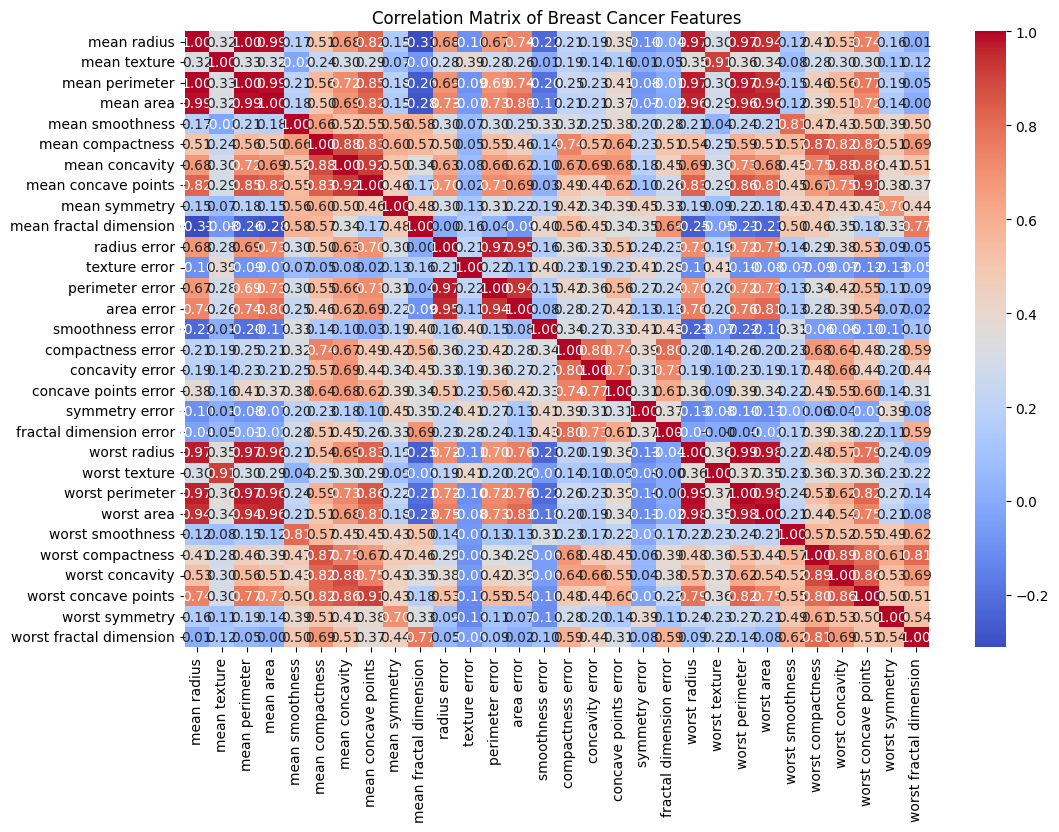

In [6]:
import seaborn as sns
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
# Calculate correlation matrix
correlation_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Breast Cancer Features')
plt.show()
